# Supervised and unsupervised models

Applications in which the training data comprises examples of the input vectors along with their corresponding target vectors are known as **supervised learning problems**. Cases such as the digit recognition example, in which the aim is to assign each input vector to one of a finite number of discrete categories, are called **classification problems**. If the desired output consists of one or more continuous variables, then the task is called **regression**.


In other pattern recognition problems, the training data consists of a set of input vectors x without any corresponding target values. The goal in such **unsupervised learning problems** may be to discover groups of similar examples within the data.

# Classification

In machine learning, classification is a supervised learning concept which basically categorizes a set of data into classes. The most common classification problems are – speech recognition, face detection, handwriting recognition, document classification, etc. It can be either a binary classification problem or a multi-class problem too. There are a bunch of machine learning algorithms for classification in machine learning. 

# Regression

The goal of regression is to predict the value of one or more continuous target variables t given the value of a D-dimensional vector x of input variables.

# Clustering

The training data consists of a set of input vectors x without any corresponding target values. The goal in such unsupervised learning problems is to discover groups of similar examples within the data.

# Dimensionality reduction

Dimensionality reduction, or dimension reduction, is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension.


1. Computationally less expensive
2. Easier to visualise data
3. Alleviate the curse of dimensionality 


**Feature Selection:**

select the features which has little information and we can drop it.


**Feature Extraction:** 

Combining features by identifying key information within each variable to create new features.


# Principal component analysis

1. PCA can be defined as the orthogonal projection of the data onto a lower dimensional linear space, known as the principal subspace, such that the variance of the projected data is maximized. 

2. PCA can be the linear projection that minimizes the average projection cost, defined as the mean squared distance between the data points and their projections.



Steps involved in PCA:

1. Standardizing the data (so each variable contributes equally)

2. Computing the covariance matrix (identify the relationship between features)

3. Calculate the eigenvalues and eigenvectors of the covariance matrix (to compute the principal components)


# Some of the training strategies 

1. Data pre-processing
2. Using more data
3. Training multiple models
4. Ensembling
5. Feature engineering
6. Model tuning
7. Regularization
8. Data augmentation 

# Evaluation metrics 

Evaluation metrics are quantitative measures used to assess the performance and effectiveness of a statistical or machine learning model. These metrics provide insights into how well the model is performing and help in comparing different models or algorithms.



**Classification Evaluation Metrics**

1. Logarithmic loss
2. Area under Curve
3. F1 score
4. Precision
5. Recall
6. Confusion Matrix

**Regression Evaluation Metrics**

1. Mean Squared Error (MSE)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import KFold, cross_val_score, cross_validate

In [9]:
import os
print(os.listdir('./data/'))

['e_commerse_data.txt', 'temp.py', 'data.csv']


# Data loading 

In [10]:
data_path='./data/'
data = pd.read_csv(data_path+'/data.csv')


In [11]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [12]:
y = data.diagnosis
x = data.drop(['Unnamed: 32','id','diagnosis'], axis=1)

In [13]:
y.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [14]:
le = LabelEncoder()
le.fit(y)

#B-0 M-1
y = le.transform(y) 

In [15]:
print(y[y==0].shape,y[y==1].shape)

(357,) (212,)


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [17]:
x_train.shape,x_test.shape

((398, 30), (171, 30))

In [18]:
std = StandardScaler()
x_std = std.fit(x_train)

In [19]:
x_train = x_std.transform(x_train)
x_test = x_std.transform(x_test)

# Principal Component Analysis(PCA) on given data

In [20]:
pca = PCA(n_components=2)
pca.fit(x_train)
print(pca.explained_variance_ratio_)
x_train_pca = pca.transform(x_train)


x_test_pca = pca.transform(x_test)

[0.4316748  0.19845652]


# Visualization of the training data using PC-1 vs PC2

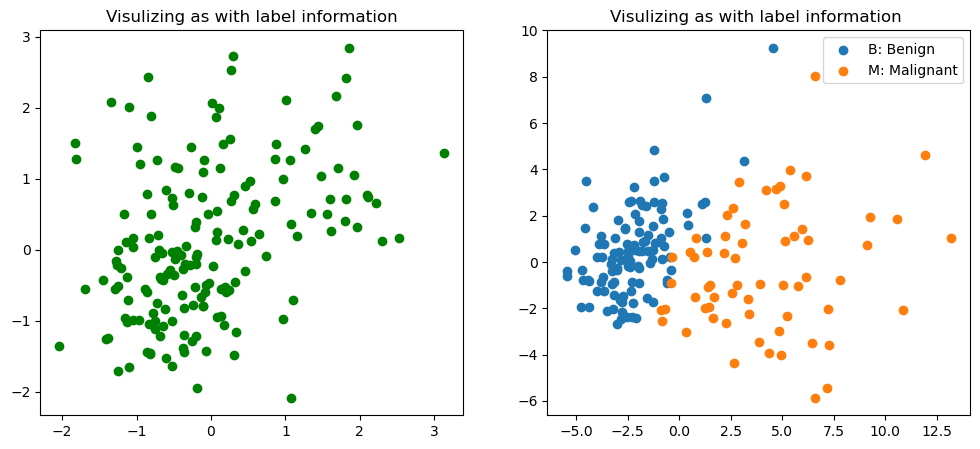

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# plt.scatter(x_train_pca[:,0], x_train_pca[:,1])
# plt.xlabel('PC-1')
# plt.ylabel('PC-2')
# plt.title('Visualization of the training data using PC-1 vs PC2')

# plt.show()


x_test_actual_B=x_test_pca[y_test==0]
x_test_actual_M=x_test_pca[y_test==1]


fig=plt.figure(figsize=(12,5))

plot=fig.add_subplot(1,2,1)
plt.scatter(x_test[:,0], x_test[:,1],color='green')
plot.set_title('Visulizing as with label information',)


plot=fig.add_subplot(1,2,2)
plt.scatter(x_test_actual_B[:,0], x_test_actual_B[:,1])
plt.scatter(x_test_actual_M[:,0], x_test_actual_M[:,1])
plot.set_title('Visulizing as with label information ',)
plt.legend(['B: Benign','M: Malignant'],loc ="upper right")

# K- means clustering:
    


1. It aims to partition given $N$ data points into $K$ clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid).

2. This cluster will comprise a group of data points whose inter-point distances are small compared with the distances to points outside of the cluster.

# K- means clustering (With complete dimensions)

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto",max_iter=500).fit(x_train)
kmeans.labels_


ac = accuracy_score(y_train,kmeans.labels_)
print('training accuracy is: ',ac)


y_predicted=kmeans.predict(x_test)
ac = accuracy_score(y_test,y_predicted)
print('testing accuracy is: ',ac)

training accuracy is:  0.907035175879397
testing accuracy is:  0.9064327485380117


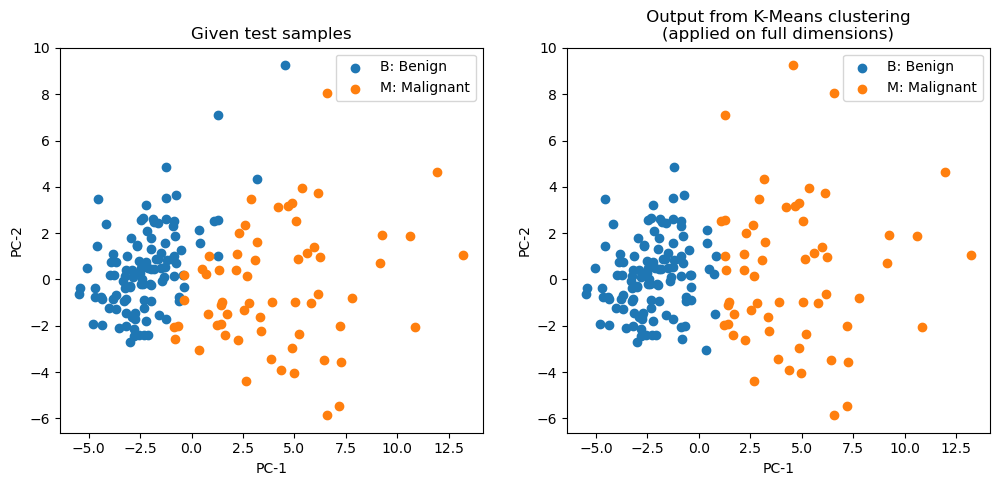

In [23]:
x_test_predicted_B=x_test_pca[y_predicted==0]
x_test_predicted_M=x_test_pca[y_predicted==1]

x_test_actual_B=x_test_pca[y_test==0]
x_test_actual_M=x_test_pca[y_test==1]


fig=plt.figure(figsize=(12,5))

plot=fig.add_subplot(1,2,1)
plt.scatter(x_test_actual_B[:,0], x_test_actual_B[:,1])
plt.scatter(x_test_actual_M[:,0], x_test_actual_M[:,1])
plt.xlabel('PC-1')
plt.ylabel('PC-2')

plot.set_title('Given test samples',)
plt.legend(['B: Benign','M: Malignant'],loc ="upper right")


plot=fig.add_subplot(1,2,2)
plt.scatter(x_test_predicted_B[:,0], x_test_predicted_B[:,1])
plt.scatter(x_test_predicted_M[:,0], x_test_predicted_M[:,1])
plt.xlabel('PC-1')
plt.ylabel('PC-2')

plot.set_title(' Output from K-Means clustering \n(applied on full dimensions)',)
plt.legend(['B: Benign','M: Malignant'],loc ="upper right")




# K- means clustering on principal components

We are considering the first 2 principal components as a feature vector.

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto",max_iter=500).fit(x_train_pca)
kmeans.labels_


ac = accuracy_score(y_train,kmeans.labels_)
print('training accuracy is: ',ac)

x_test_pca = pca.transform(x_test)

y_predicted=kmeans.predict(x_test_pca)

ac = accuracy_score(y_test,y_predicted)
print('testing accuracy is: ',ac)

training accuracy is:  0.9045226130653267
testing accuracy is:  0.9064327485380117


Text(0.5, 1.0, ' Output from K-Means clustering \n(applied on PC)')

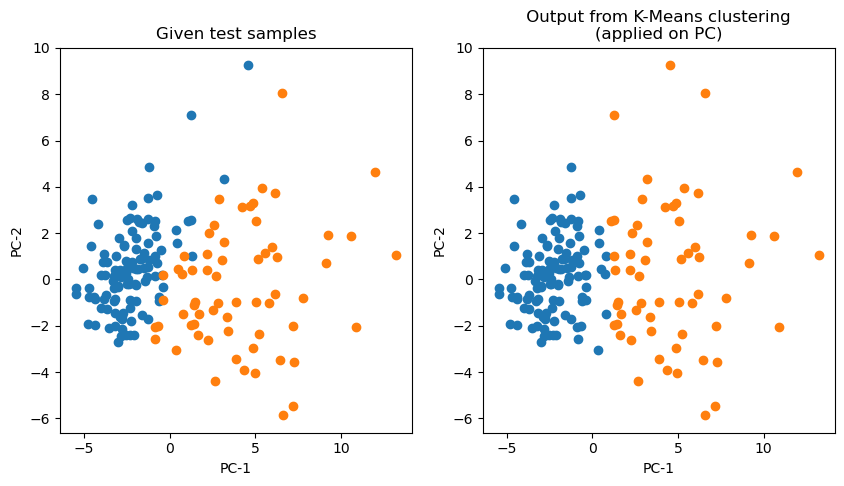

In [25]:
x_test_predicted_B=x_test_pca[y_predicted==0]
x_test_predicted_M=x_test_pca[y_predicted==1]

x_test_actual_B=x_test_pca[y_test==0]
x_test_actual_M=x_test_pca[y_test==1]


fig=plt.figure(figsize=(10,5))

plot=fig.add_subplot(1,2,1)
plt.scatter(x_test_actual_B[:,0], x_test_actual_B[:,1])
plt.scatter(x_test_actual_M[:,0], x_test_actual_M[:,1])
plt.xlabel('PC-1')
plt.ylabel('PC-2')

plot.set_title('Given test samples',)

plot=fig.add_subplot(1,2,2)
plt.scatter(x_test_predicted_B[:,0], x_test_predicted_B[:,1])
plt.scatter(x_test_predicted_M[:,0], x_test_predicted_M[:,1])
plt.xlabel('PC-1')
plt.ylabel('PC-2')

plot.set_title(' Output from K-Means clustering \n(applied on PC)',)

# K-Nearest Neighbor(KNN) Classifier

In [26]:
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
ac = accuracy_score(y_test,clf.predict(x_test))
print('Accuracy is: ',ac)

Accuracy is:  0.9590643274853801


# K-Nearest Neighbor(KNN) Classifier with K-fold

K-nearest neighbors algorithm (k-NN) is a non-parametric supervised learning method for the classification.

The data point will be assigned to the class which is most common among its k nearest neighbors.


To determine the closest groups or the nearest points for the given point we need some metric. For this purpose, we can use some of the distance metrics like:

1. Euclidean Distance
2. Manhattan Distance

In [27]:
k_folds = KFold(n_splits = 5)

In [28]:
clf = KNeighborsClassifier()
scores = cross_validate(clf, x, y, cv=k_folds, scoring=['accuracy', 'precision', 'recall', 'f1'])


In [29]:
print('test accuracy:',scores['test_accuracy'].mean())

test accuracy: 0.9262071106970966


In [30]:
scores

{'fit_time': array([0.00444651, 0.00235176, 0.00165701, 0.00147605, 0.00139046]),
 'score_time': array([0.03266335, 0.01416349, 0.01415253, 0.00910473, 0.00851345]),
 'test_accuracy': array([0.85964912, 0.92105263, 0.96491228, 0.94736842, 0.9380531 ]),
 'test_precision': array([0.98148148, 0.93478261, 0.97368421, 0.92592593, 0.80645161]),
 'test_recall': array([0.77941176, 0.87755102, 0.925     , 0.86206897, 0.96153846]),
 'test_f1': array([0.86885246, 0.90526316, 0.94871795, 0.89285714, 0.87719298])}

# LogisticRegression

Logistic Regression is a supervised algorithm for classification.

It models the posterior probability of $x$ as a function of vector (one or more independent variables).

In [31]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
ac = accuracy_score(y_test,clf.predict(x_test))
print('Accuracy is: ',ac)

Accuracy is:  0.9824561403508771


# Supprt Vector Machine(SVM) Classifier

Support vector machines (SVMs) are a set of supervised learning methods used for classification,

SVM uses advantage of the kernel functions for doing efficient classification by projecting into high dimensional space implicitly.

Basically, SVM is binary classification algorithm. But we can use it for multi-class also.

In SVM it finds the **maximum margin separating hyperplane**.


In [32]:
clf = SVC(C=1)
clf.fit(x_train, y_train)

ac = accuracy_score(y_train,clf.predict(x_train))
print('Training accuracy is: ',ac)

ac = accuracy_score(y_test,clf.predict(x_test))
print('Test accuracy is: ',ac)

Training accuracy is:  0.9874371859296482
Test accuracy is:  0.9766081871345029


The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. 

SVMs decision function depends on some subset of the training data, called the support vectors. 

In [33]:
print('number of support vectors',clf.support_vectors_.shape[0])

number of support vectors 97


# SVM Classification by using first 2 principle components

Training accuracy is:  0.9447236180904522
Test accuracy is:  0.9707602339181286
number of support vectors 61


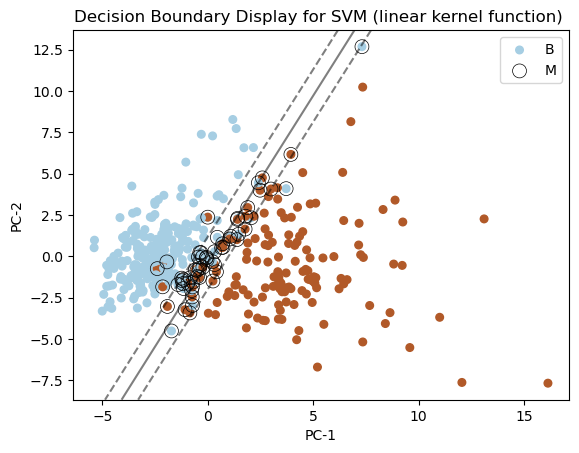

In [34]:
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

clf = SVC(kernel="linear", C=1000)
clf.fit(x_train_pca, y_train)

ac = accuracy_score(y_train,clf.predict(x_train_pca))
print('Training accuracy is: ',ac)

ac = accuracy_score(y_test,clf.predict(x_test_pca))
print('Test accuracy is: ',ac)

print('number of support vectors',clf.support_vectors_.shape[0])

plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    x_train_pca,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=0.5,
    facecolors="none",
    edgecolors="k",
)
plt.legend(['B','M'])


plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.title('Decision Boundary Display for SVM (linear kernel function) ')
plt.show()

In [35]:
clf.support_vectors_.shape

(61, 2)

Training accuracy is:  0.949748743718593
Test accuracy is:  0.9590643274853801
number of support vectors 64


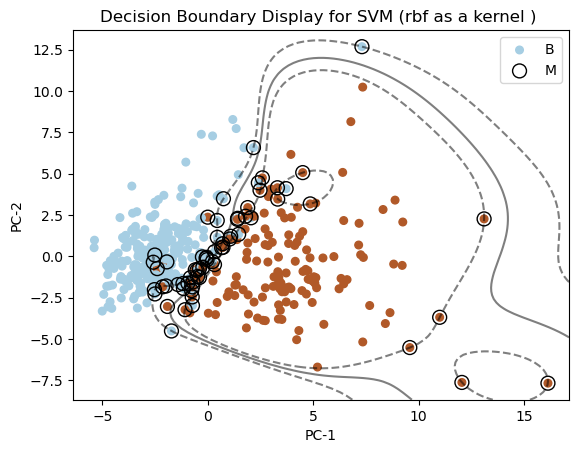

In [36]:
clf = SVC(kernel="rbf", C=1000)
clf.fit(x_train_pca, y_train)

ac = accuracy_score(y_train,clf.predict(x_train_pca))
print('Training accuracy is: ',ac)

ac = accuracy_score(y_test,clf.predict(x_test_pca))
print('Test accuracy is: ',ac)

print('number of support vectors',clf.support_vectors_.shape[0])

plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    x_train_pca,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.legend(['B','M'])


plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.title('Decision Boundary Display for SVM (rbf as a kernel ) ')
plt.show()

Training accuracy is:  0.9221105527638191
Test accuracy is:  0.9415204678362573
number of support vectors 73


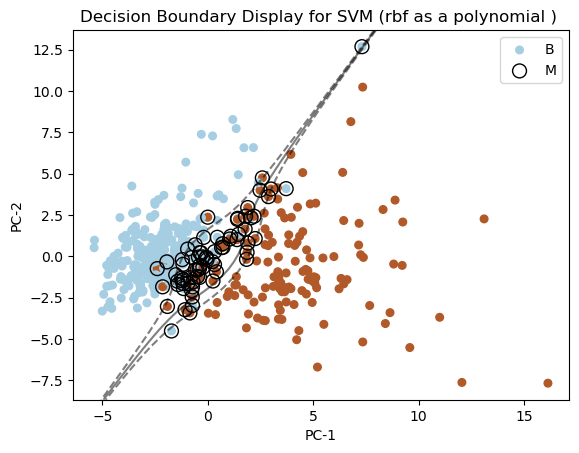

In [37]:
clf = SVC(kernel="poly",C=1000)
clf.fit(x_train_pca, y_train)

ac = accuracy_score(y_train,clf.predict(x_train_pca))
print('Training accuracy is: ',ac)

ac = accuracy_score(y_test,clf.predict(x_test_pca))
print('Test accuracy is: ',ac)

print('number of support vectors',clf.support_vectors_.shape[0])

plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    x_train_pca,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.legend(['B','M'])


plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.title('Decision Boundary Display for SVM (rbf as a polynomial ) ')
plt.show()

Training accuracy is:  0.9422110552763819
Test accuracy is:  0.9473684210526315
number of support vectors 67


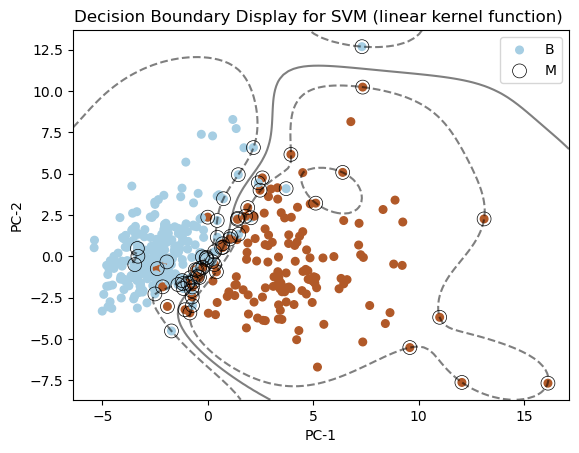

In [38]:
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

clf = SVC(C=100)
clf.fit(x_train_pca, y_train)

ac = accuracy_score(y_train,clf.predict(x_train_pca))
print('Training accuracy is: ',ac)

ac = accuracy_score(y_test,clf.predict(x_test_pca))
print('Test accuracy is: ',ac)

print('number of support vectors',clf.support_vectors_.shape[0])

plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    x_train_pca,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=0.5,
    facecolors="none",
    edgecolors="k",
)
plt.legend(['B','M'])


plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.title('Decision Boundary Display for SVM (linear kernel function) ')
plt.show()

# Number of Training samples vs Test accuracy

In [39]:
train_sizes = []
test_accuracies = []
train_accuracies = []

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

std = StandardScaler()
x_std = std.fit(x_train)
x_train = x_std.transform(x_train)
x_test = x_std.transform(x_test)

for train_size in range(10, 410, 10):
    # print('len(x)', len(x))
    # x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1-(train_ratio/100), random_state=42)
    x_train_1 = x_train[:train_size]
    y_train_1 = y_train[:train_size]
    
    clf = SVC(gamma='auto')
    clf.fit(x_train_1, y_train_1)
    ac = accuracy_score(y_test,clf.predict(x_test))
    print('Train size:', train_size)
    print('Test accuracy:', ac)
    print('')
    train_sizes.append(train_size)
    test_accuracies.append(ac)
    train_accuracies.append(accuracy_score(y_train,clf.predict(x_train)))
    
print('Best results at:')
max_accuracy_index=np.argmax(test_accuracies)
print(max_accuracy_index)
print('training data size:',train_sizes[max_accuracy_index])
print('training error:',1-train_accuracies[max_accuracy_index])
print('max test accuracy:',test_accuracies[max_accuracy_index])


Train size: 10
Test accuracy: 0.631578947368421

Train size: 20
Test accuracy: 0.9005847953216374

Train size: 30
Test accuracy: 0.935672514619883

Train size: 40
Test accuracy: 0.9298245614035088

Train size: 50
Test accuracy: 0.9590643274853801

Train size: 60
Test accuracy: 0.9415204678362573

Train size: 70
Test accuracy: 0.9415204678362573

Train size: 80
Test accuracy: 0.9532163742690059

Train size: 90
Test accuracy: 0.9590643274853801

Train size: 100
Test accuracy: 0.9590643274853801

Train size: 110
Test accuracy: 0.9532163742690059

Train size: 120
Test accuracy: 0.9532163742690059

Train size: 130
Test accuracy: 0.9532163742690059

Train size: 140
Test accuracy: 0.9532163742690059

Train size: 150
Test accuracy: 0.9532163742690059

Train size: 160
Test accuracy: 0.9532163742690059

Train size: 170
Test accuracy: 0.9590643274853801

Train size: 180
Test accuracy: 0.9590643274853801

Train size: 190
Test accuracy: 0.9649122807017544

Train size: 200
Test accuracy: 0.970760233

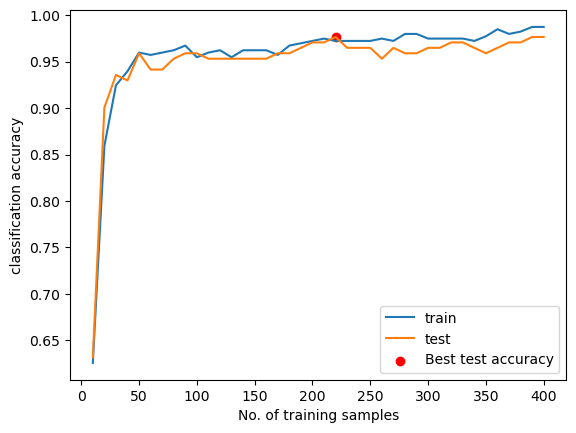

In [40]:
plt.plot(train_sizes, train_accuracies)
plt.plot(train_sizes, test_accuracies)
plt.scatter(train_sizes[max_accuracy_index],test_accuracies[max_accuracy_index],color = 'red')
plt.xlabel('No. of training samples')
plt.ylabel('classification accuracy')
plt.legend(['train','test','Best test accuracy'])


# Guassina Mixture Models (GMM)

In [41]:
# adapted from http://www.nhsilbert.net/source/2014/06/bivariate-normal-ellipse-plotting-in-python/
# and https://github.com/joferkington/oost_paper_code/blob/master/error_ellipse.py
def plot_cov_ellipse(cov, pos, nstd=2, ax=None, fc='none', ec=[0,0,0], a=1, lw=2):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the 
    ellipse patch artist.

    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
        A matplotlib ellipse artist
    """
    from scipy.stats import chi2
    from matplotlib.patches import Ellipse
    
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    
    kwrg = {'facecolor':fc, 'edgecolor':ec, 'alpha':a, 'linewidth':lw}

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwrg)

    ax.add_artist(ellip)
    return ellip

In [42]:
def plot_gmm(data, gmm):
    #plot scatter-plot with linewidth (lw)=0
    plt.scatter(data[:,0], data[:,1], lw=0)
    plt.xlabel('Principal component-1')    
    plt.ylabel('Principal component-2')    

    #the number of Gaussian mixtures
    k =  gmm.weights_.shape[0]  
    for c in range(0,k):   
        #plot ellipse for each k with mean and covariance matrix
        plot_cov_ellipse(gmm.covariances_[c], gmm.means_[c]) 

In [43]:
gmix = GaussianMixture(n_components=2, covariance_type='full')

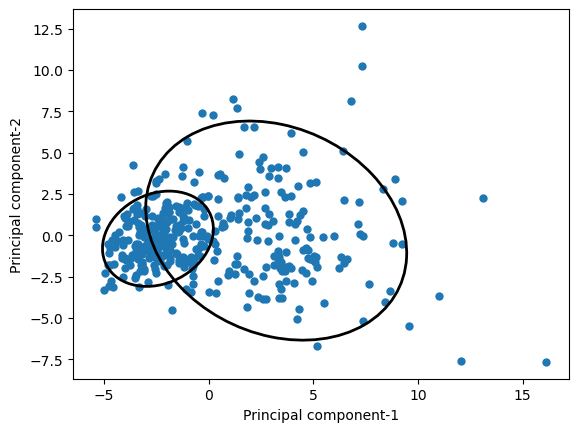

In [44]:
gmix.fit(x_train_pca)
plot_gmm(x_train_pca, gmix)

# Linear regression

In [45]:
import pandas as pd


import os
print(os.listdir('./'))
data_path='./data/'
df = pd.read_csv(data_path+'/e_commerse_data.txt')

df.head()

['.ipynb_checkpoints', 'data', 'demo_on_sklearn_with_classification_clustering_regression.ipynb', 'README.md']


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [46]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [47]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [49]:
X_train.shape,X_test.shape

((350, 4), (150, 4))

In [50]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


In [51]:
y_pred = lm.predict(X_test)
y_train_pred=lm.predict(X_train)

Training Error (Mean Squared Error): 106.85137432285747
Testing Error (Mean Squared Error): 79.8130516509745


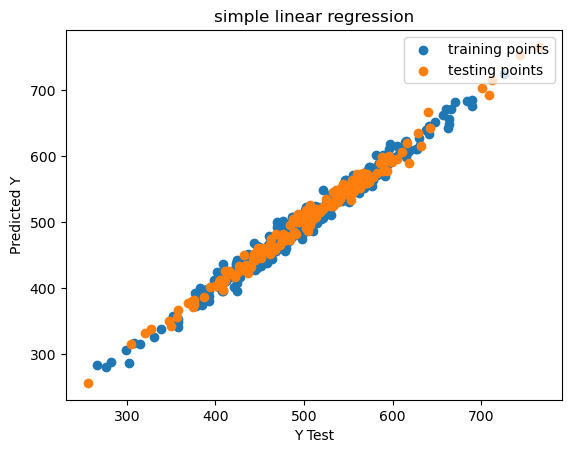

In [52]:
import matplotlib.pyplot as plt
from sklearn import metrics



plt.scatter(y_train,y_train_pred)
plt.scatter(y_test,y_pred)

plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('simple linear regression')

plt.legend(['training points','testing points'],loc ="upper right")

print('Training Error (Mean Squared Error):', metrics.mean_squared_error(y_train, y_train_pred))
print('Testing Error (Mean Squared Error):', metrics.mean_squared_error(y_test, y_pred))


**Rigde regression:**

$||y - Xw||^2_2 + alpha * ||w||^2_2$

Coefficients: 
 [25.97389493 38.577967    0.19080384 61.26156024]
Training Error (Mean Squared Error): 106.85187243233105
Testing Error (Mean Squared Error): 79.84498752781445


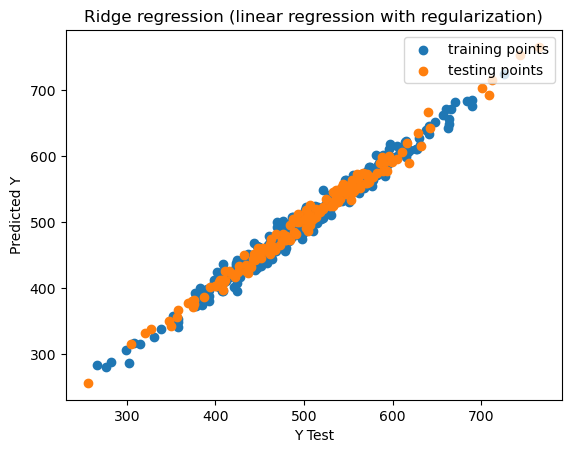

In [53]:
from sklearn.linear_model import Ridge

lm = Ridge(alpha=0.1)
lm.fit(X_train,y_train)
print('Coefficients: \n', lm.coef_)

y_pred = lm.predict(X_test)
y_train_pred=lm.predict(X_train)


import matplotlib.pyplot as plt
from sklearn import metrics



plt.scatter(y_train,y_train_pred)
plt.scatter(y_test,y_pred)

plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Ridge regression (linear regression with regularization)')
plt.legend(['training points','testing points'],loc ="upper right")

print('Training Error (Mean Squared Error):', metrics.mean_squared_error(y_train, y_train_pred))
print('Testing Error (Mean Squared Error):', metrics.mean_squared_error(y_test, y_pred))